In [1]:
import pymc3 as pm
import theano
import sys
import numpy as np
sys.version

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python37\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


'3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]'

In [2]:
x = np.array([4, 9, 7, 15])
y = np.array([21, 59, 25, 127])

x_shared = theano.shared(np.array(x))
y_shared = theano.shared(np.array(y))

In [3]:
model = pm.Model()

with model:
    
    a = pm.Normal('a', mu=1, sigma=7)

    eps = pm.Normal('epsilon', mu=16, sigma=3)
    
    mu = a * x_shared
    
    y_obs = pm.Normal('y_obs', mu=mu,
                      sigma=eps, observed=y_shared)

map_estimate = pm.find_MAP(model=model)
map_estimate

{'a': array(7.17575137), 'epsilon': array(16.13113097)}

In [4]:
with model:
    trace = pm.sample(100, tune=600, random_seed=13)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, a]


Sampling 4 chains for 600 tune and 100 draw iterations (2_400 + 400 draws total) took 27 seconds.
The acceptance probability does not match the target. It is 0.8933201745510536, but should be close to 0.8. Try to increase the number of tuning steps.


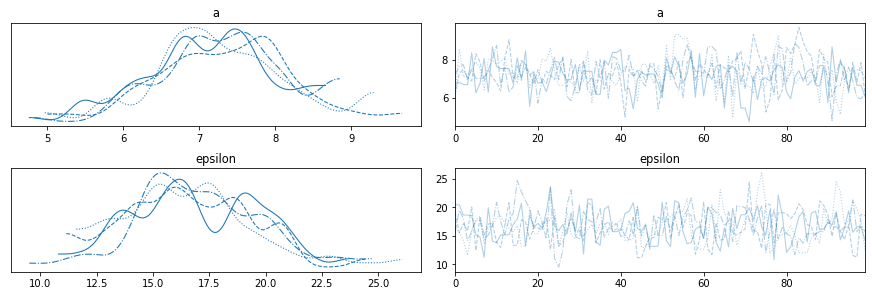

In [5]:
with model:
    pm.traceplot(trace)

In [6]:
x_shared.set_value(np.array([14]))

In [7]:
with model:
    post_pred = pm.sample_posterior_predictive(trace,
                                               samples=200,
                                               random_seed=13)

c:\python37\lib\site-packages\pymc3\sampling.py:1618: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [8]:
post_pred['y_obs'].mean(), post_pred['y_obs'].var()

(100.385232846889, 397.50197866399293)